In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
stock_symbol = "AAPL"  # Change to any stock symbol, e.g., "TSLA"
data = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")

C:\Users\USER 1\AppData\Local\Temp\ipykernel_9688\1647378419.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [4]:
# Shift Close column by 1 day to make it the "next day's close"
data['Next_Close'] = data['Close'].shift(-1)

In [5]:
# Drop last row (NaN target)
data = data.dropna()

In [6]:
# Features and Target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [ ]:
# Random Forest does not give good results for this task, so we will use Linear Regression
#model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Linear Regression
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [18]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 3.11
R² Score: 0.9852


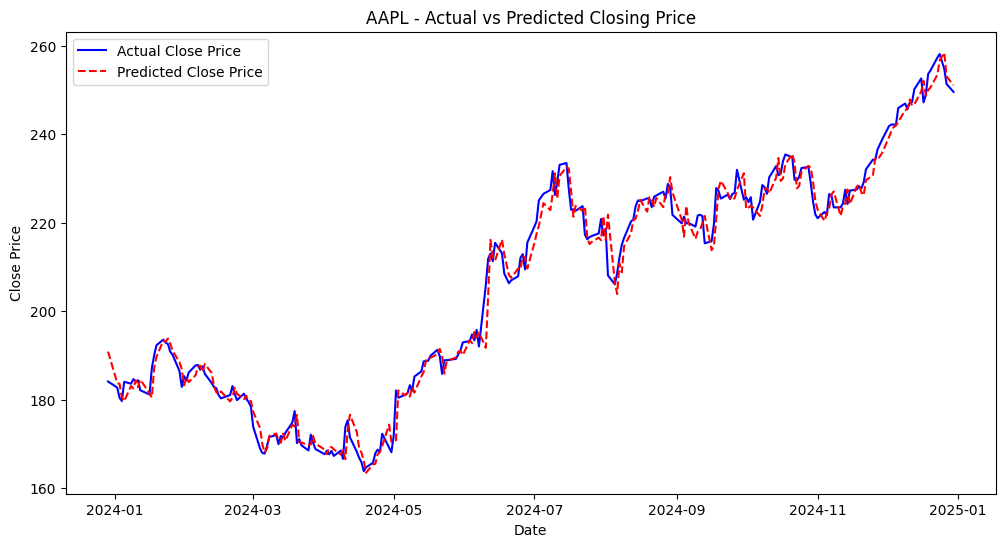

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Close Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Close Price", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"{stock_symbol} - Actual vs Predicted Closing Price")
plt.legend()
plt.show()